In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

---
__1__ 


Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):  

zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],  

ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].  

Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

---


__a)__ C intercept

In [23]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])
zp, ks

(array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110]),
 array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832]))

In [24]:
b_1 = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp) ** 2)
b_1

2.620538882402765

In [25]:
a = np.mean(ks) - b_1 * np.mean(zp)
a

444.1773573243596

__b)__ Без intercept

In [26]:
zp = zp.reshape((10, 1))
zp

array([[ 35],
       [ 45],
       [190],
       [200],
       [ 40],
       [ 70],
       [ 54],
       [150],
       [120],
       [110]])

In [27]:
ks = ks.reshape((10, 1))
ks

array([[401],
       [574],
       [874],
       [919],
       [459],
       [739],
       [653],
       [902],
       [746],
       [832]])

In [28]:
b_2 = np.dot(np.linalg.inv(np.dot(zp.T, zp)), zp.T@ks)
b_2[0,0]

5.889820420132688

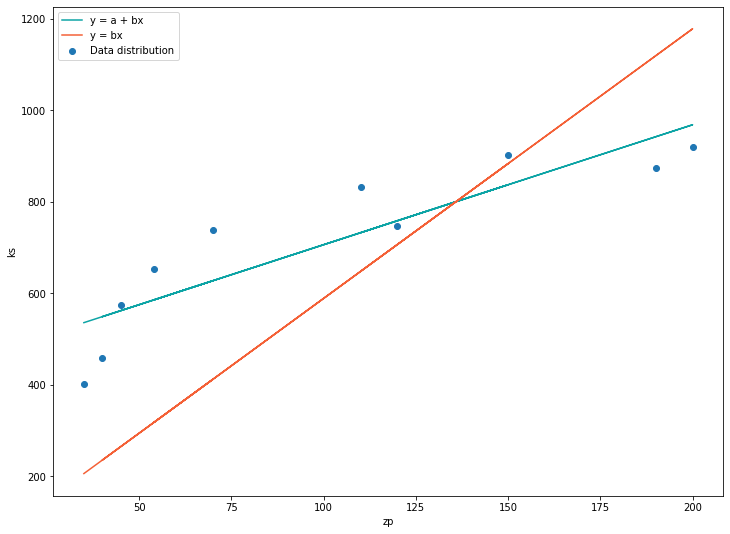

In [29]:
y_hat_a = a + b_1 * zp
y_hat_b = b_2 * zp

plt.figure(figsize = (12, 9))
plt.scatter(zp, ks, label='Data distribution')
plt.xlabel('zp')
plt.ylabel('ks')
plt.plot(zp, y_hat_a, label='y = a + bx', color='#0CA4A5')
plt.plot(zp, y_hat_b, label='y = bx', color='#F46036')
plt.legend()
plt.show()

In [37]:
# y_mean = np.mean(ks)
# r = np.sqrt((np.sum((ks - y_mean)**2) - np.sum((ks - y_hat_a)**2))/((np.sum((ks - y_mean)**2)))) # другой способ

r2 = np.corrcoef(zp.T, ks.T)[0, 1]**2
r2

0.7876386635293682

---
__2__ Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

---

In [42]:
def mse_(b1, y=ks, x=zp, n=10):
  return np.sum((b1 * x - y)**2)/n

In [43]:
alpha = 1e-5
b1 = 1
n = 10
for i in range(30):
  b1 -= alpha * (2/n) * np.sum((b1*zp-ks)*zp)
  print('B1={b1}, mse={mse}'.format(b1=b1, mse=mse_(b1)))

B1=2.347302, mse=229405.42884192182
B1=3.323379185336, mse=147258.09593438005
B1=4.0305158716420015, mse=104142.74927779149
B1=4.5428137724967375, mse=81513.49216715519
B1=4.913957208133167, mse=69636.43870268925
B1=5.182838750661819, mse=63402.72107298065
B1=5.377634824014467, mse=60130.93016935293
B1=5.5187583456841125, mse=58413.71800914132
B1=5.620997821181078, mse=57512.432538878216
B1=5.695067049515413, mse=57039.38936009754
B1=5.748727835228332, mse=56791.110810876475
B1=5.787603357332199, mse=56660.8008502462
B1=5.815767429079743, mse=56592.40716141274
B1=5.836171397810544, mse=56556.510468254135
B1=5.850953420229009, mse=56537.66994946213
B1=5.86166252244647, mse=56527.781430015966
B1=5.86942092431175, mse=56522.59140218727
B1=5.8750416381942845, mse=56519.867395928384
B1=5.879113665539337, mse=56518.43769066604
B1=5.882063719045952, mse=56517.68730430751
B1=5.884200938409783, mse=56517.293461113455
B1=5.885749285447859, mse=56517.08675098376
B1=5.88687101332984, mse=56516.978

---
__*3__ Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

---

In [44]:
def mse_(b0, b1, y=ks, x=zp, n=10):
  return np.sum((b0 + b1 * x - y)**2)/n

B0=430.82785144, B1=1.536102, mse=25785.825345421745,
B0=448.88149181060203, B1=1.8619718610156801, mse=13696.256559806387,
B0=459.27916257004546, B1=2.061441364814407, mse=9292.58875374917,
B0=465.0942848711123, B1=2.1848641609923116, mse=7674.790784463747,
B0=468.17219236295176, B1=2.262486959267162, mse=7070.007404120685,
B0=469.6206555095131, B1=2.3124801962942962, mse=6835.624803445964,
B0=470.10448699832443, B1=2.345761213475644, mse=6738.014678590337,
B0=470.0224794053781, B1=2.368891035171671, mse=6691.825610872501,
B0=469.6136723141839, B1=2.3858141622346434, mse=6665.627789963418,
B0=469.0211751343251, B1=2.3989034870326424, mse=6647.6956221381,
B0=468.33049813892114, B1=2.409587868271153, mse=6633.559391068642,
B0=467.5925733056513, B1=2.4187290535249337, mse=6621.4536569108195,
B0=466.83757996165633, B1=2.426848061285241, mse=6610.639823537187,
B0=466.08324786555767, B1=2.434261149100957, mse=6600.780361738711,
B0=465.339843488277, B1=2.441161479495521, mse=6591.70102191100

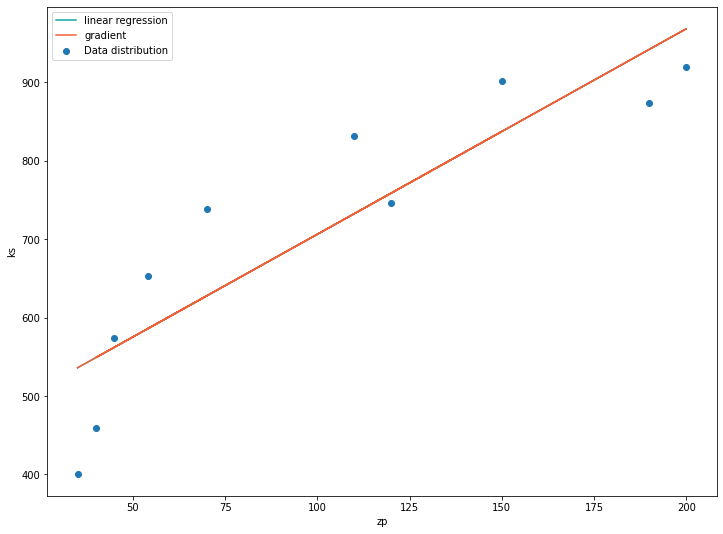

In [48]:
alpha_1 = 1e-5
alpha_0 = 1e-1
b0 = 400
b1 = 1
n = 10
for i in range(300):
  b1 -= alpha_1 * (2/n) * np.sum((b0+b1*zp-ks)*zp)
  b0 -= alpha_0 * (2/n) * np.sum(b0+b1*zp-ks)
  print('B0={b0}, B1={b1}, mse={mse},'.format(b0=b0, b1=b1, mse=mse_(b0, b1)))

plt.ion()
plt.figure(figsize = (12, 9))
plt.scatter(zp, ks, label='Data distribution')
plt.xlabel('zp')
plt.ylabel('ks')
plt.plot(zp, y_hat_a, label='linear regression', color='#0CA4A5')
plt.plot(zp, b0 + b1*zp, label='gradient', color='#F46036')
plt.legend()
plt.show()
